<a href="https://colab.research.google.com/github/minykang/Colab-test/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# GPU 확인: 안되면 런타임 -> 런타임 유형 변경 -> GPU 설정되어 있는 지 확인
!nvidia-smi

Wed May 22 15:05:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              28W /  70W |    103MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
!pip install --upgrade diffusers accelerate transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinu

In [17]:
!pip install --upgrade scipy

In [14]:
!pip install scipy

RuntimeError: Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.single_file because of the following error (look up to see its traceback):
Failed to import diffusers.schedulers.scheduling_lms_discrete because of the following error (look up to see its traceback):
cannot import name '_NoValue' from 'scipy._lib.deprecation' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py)

In [22]:
import requests
from PIL import Image
from io import BytesIO
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=768, width=768).images[0]

image.save("astronaut_rides_horse.png")

image

RuntimeError: Failed to import diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.single_file because of the following error (look up to see its traceback):
Failed to import diffusers.schedulers.scheduling_lms_discrete because of the following error (look up to see its traceback):
cannot import name '_NoValue' from 'scipy._lib.deprecation' (/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py)

In [23]:
!pip uninstall scipy
!pip install scipy

Found existing installation: scipy 1.13.0
Uninstalling scipy-1.13.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scipy-1.13.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-24bff013.3.26.dev.so
    /usr/local/lib/python3.10/dist-packages/scipy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/scipy/*
Proceed (Y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n, 
Proceed (Y/n)? ㅛ
Your response ('ㅛ') was not one of the expected responses: y, n, 
Proceed (Y/n)? y
  Successfully uninstalled scipy-1.13.0
  Using cached scipy-1.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)


In [26]:
!pip install --upgrade diffusers scipy


In [4]:
from diffusers import StableDiffusionUpscalePipeline

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))
prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


NameError: name 'requests' is not defined

In [3]:
!pip install requests

In [5]:
from diffusers import StableDiffusionUpscalePipeline

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))
prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

NameError: name 'requests' is not defined

In [6]:
import requests

In [7]:
from diffusers import StableDiffusionUpscalePipeline

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))
prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


NameError: name 'Image' is not defined

In [8]:
!pip install Pillow

In [9]:
from PIL import Image

In [10]:
from diffusers import StableDiffusionUpscalePipeline

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))
prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


NameError: name 'BytesIO' is not defined

In [11]:
import io

# Rest of the code remains the same

In [12]:
import io
import requests
from diffusers import StableDiffusionUpscalePipeline

# load model and scheduler
model_id = "stabilityai/stable-diffusion-x4-upscaler"
pipeline = StableDiffusionUpscalePipeline.from_pretrained(
    model_id, revision="fp16", torch_dtype=torch.float16
)
pipeline = pipeline.to("cuda")

# let's download an  image
url = "https://huggingface.co/datasets/hf-internal-testing/diffusers-images/resolve/main/sd2-upscale/low_res_cat.png"
response = requests.get(url)
low_res_img = Image.open(io.BytesIO(response.content)).convert("RGB")
low_res_img = low_res_img.resize((128, 128))
prompt = "a white cat"

upscaled_image = pipeline(prompt=prompt, image=low_res_img).images[0]
upscaled_image.save("upsampled_cat.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-x4-upscaler via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_upscale.py:136: FutureWarning: The configuration file of the vae does not contain `scaling_factor` or it is set to 0.18215, which seems highly unlikely. If your checkpoint is a fine-tuned version of `stabilityai/stable-diffusion-x4-upscaler` you should change 'scaling_factor' to 0.08333 Please make sure to update the config accordingly, as not doing so might lead to incorrect results in future versions. If you have downloaded this checkpoint from the Hugging Face Hub, it would be very nice if you could open a Pull Request for the `vae/config.json` file
  deprecate("wrong scaling_factor", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/75 [00:00<?, ?it/s]

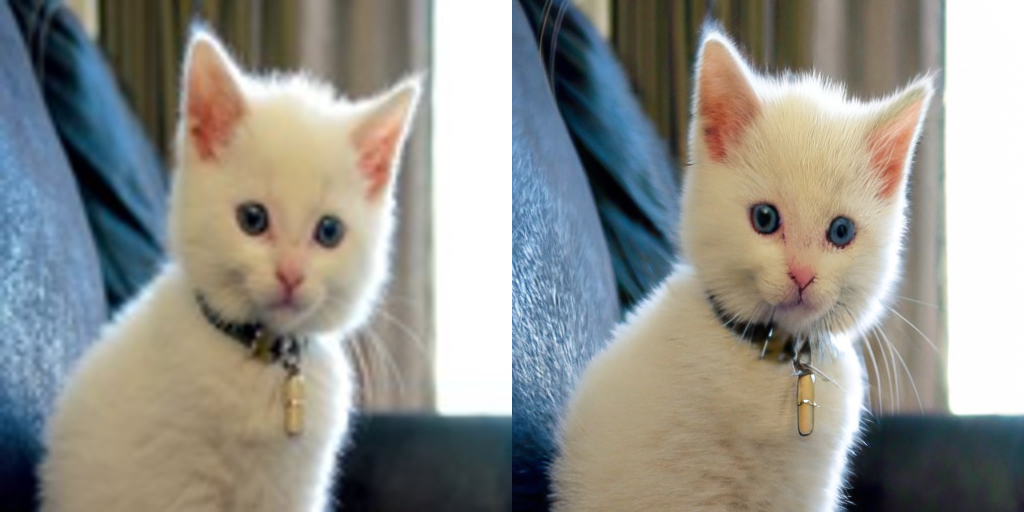

In [13]:
from diffusers.utils import make_image_grid, load_image

make_image_grid([low_res_img.resize(upscaled_image.size), upscaled_image], rows=1, cols=2)

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:212: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/900 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/815 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


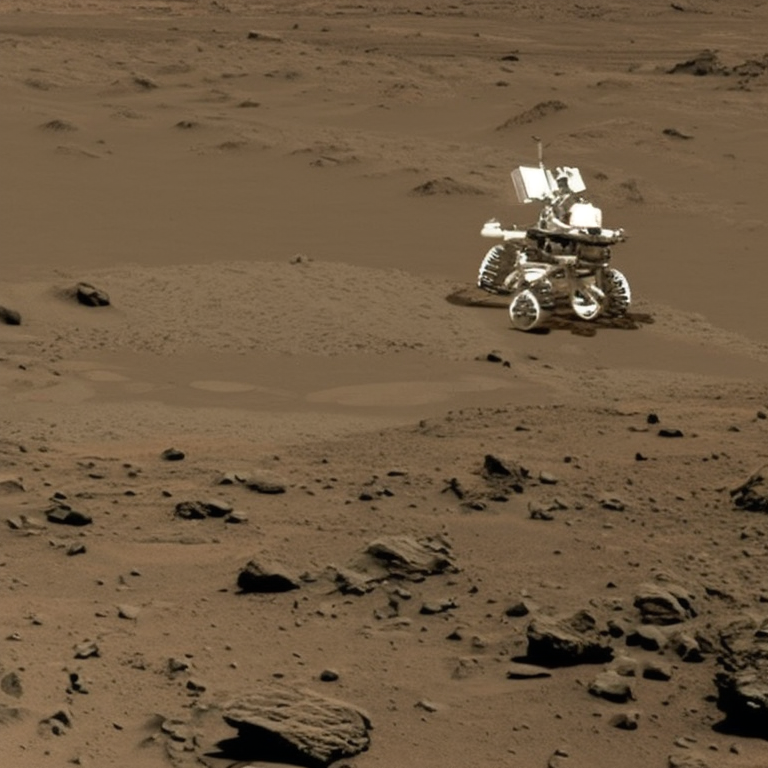

In [14]:
import requests
from PIL import Image
from io import BytesIO
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=768, width=768).images[0]

image.save("astronaut_rides_horse.png")

image

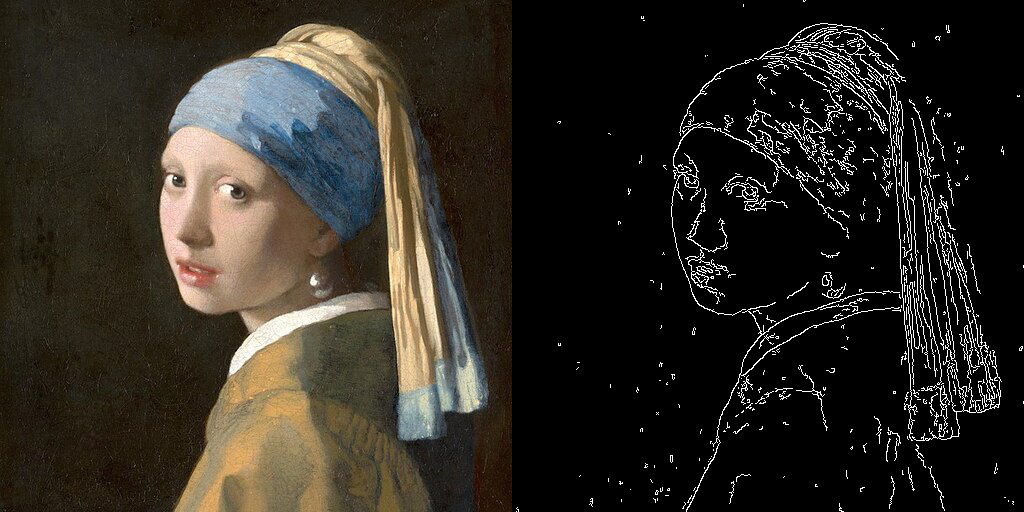

In [15]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np

original_image = load_image(
    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
)

image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

make_image_grid([original_image, canny_image], rows=1, cols=2)

In [16]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

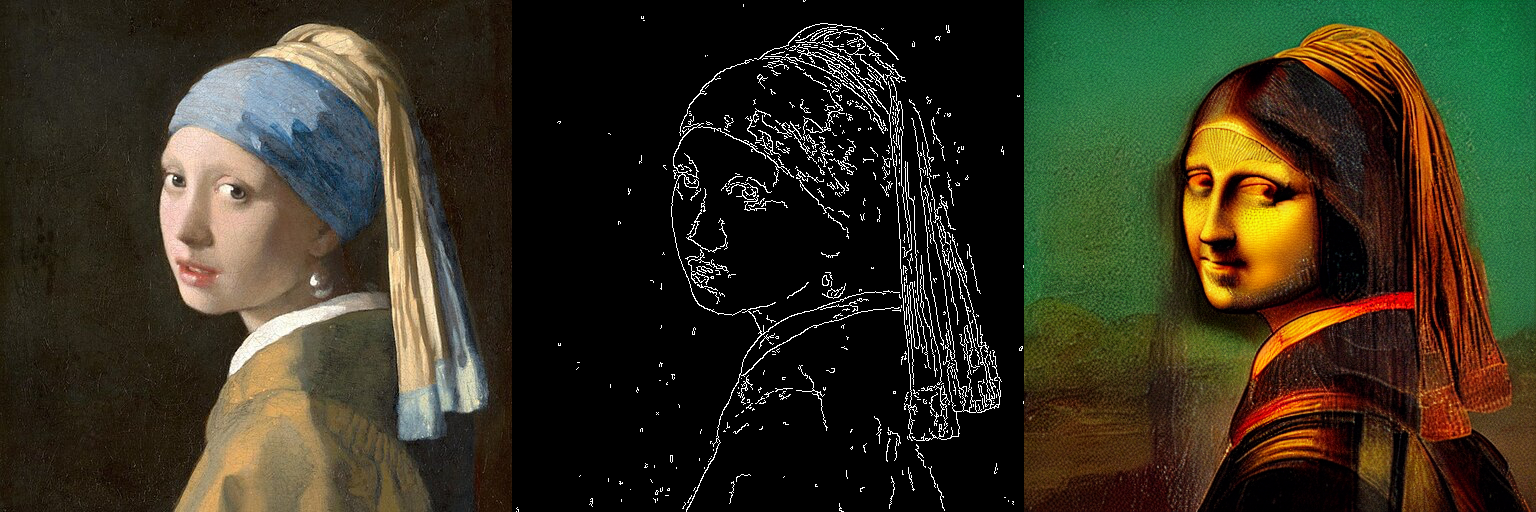

In [17]:
output = pipe(
    "the mona lisa", image=canny_image
).images[0]
make_image_grid([original_image, canny_image, output], rows=1, cols=3)

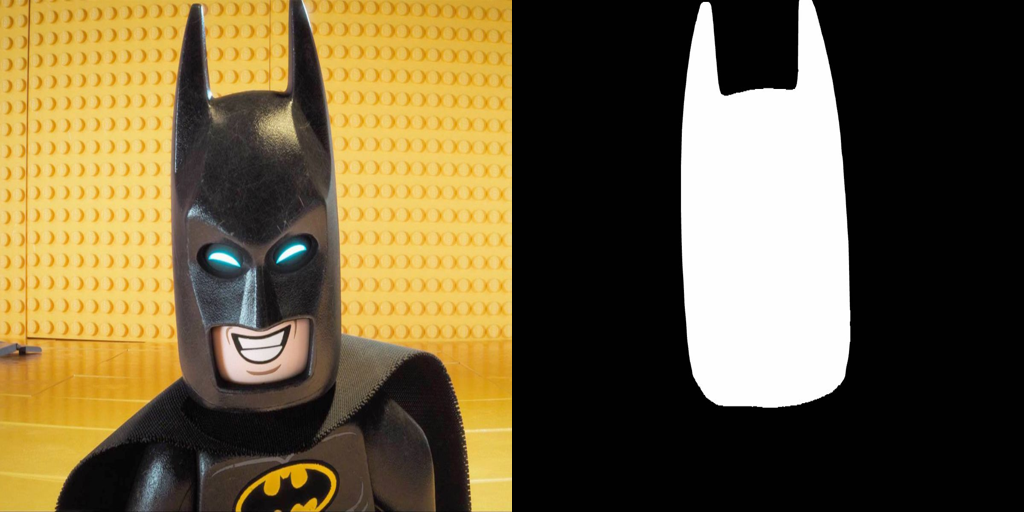

In [18]:
from diffusers.utils import load_image, make_image_grid

init_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/controlnet-inpaint.jpg"
)
init_image = init_image.resize((512, 512))

mask_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/controlnet-inpaint-mask.jpg"
)
mask_image = mask_image.resize((512, 512))
make_image_grid([init_image, mask_image], rows=1, cols=2)

In [19]:
import numpy as np
import torch

def make_inpaint_condition(image, image_mask):
    image = np.array(image.convert("RGB")).astype(np.float32) / 255.0
    image_mask = np.array(image_mask.convert("L")).astype(np.float32) / 255.0

    assert image.shape[0:1] == image_mask.shape[0:1]
    image[image_mask > 0.5] = -1.0  # set as masked pixel
    image = np.expand_dims(image, 0).transpose(0, 3, 1, 2)
    image = torch.from_numpy(image)
    return image

control_image = make_inpaint_condition(init_image, mask_image)

config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

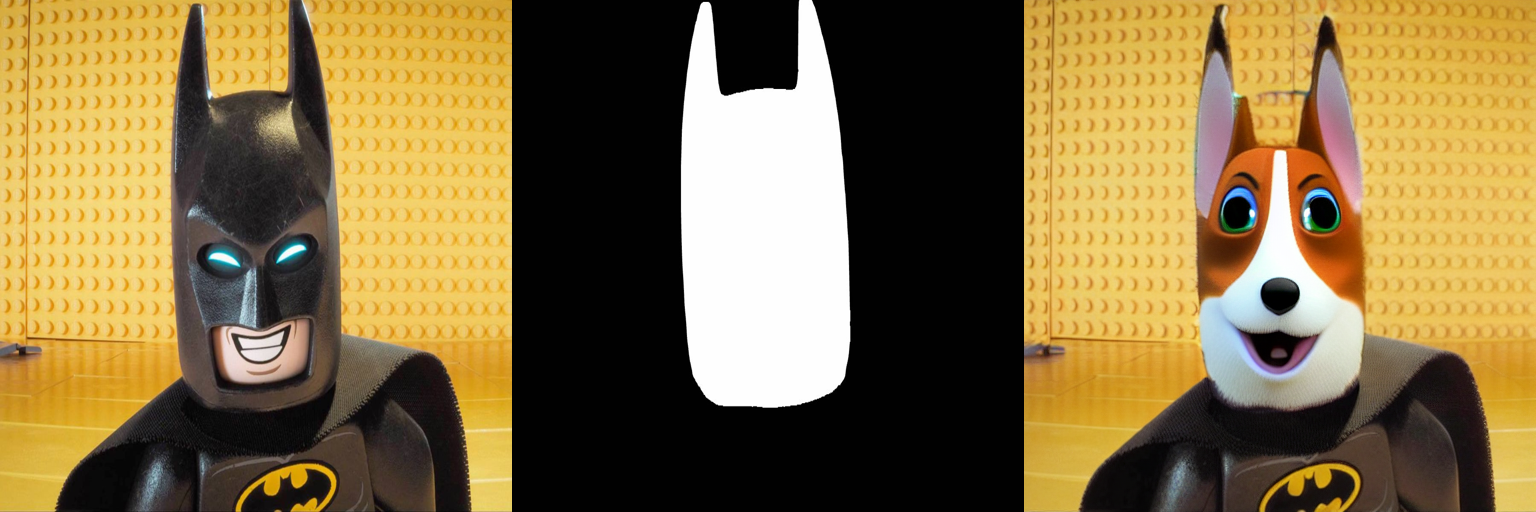

In [20]:
from diffusers import StableDiffusionControlNetInpaintPipeline, ControlNetModel, UniPCMultistepScheduler

controlnet = ControlNetModel.from_pretrained("lllyasviel/control_v11p_sd15_inpaint", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

output = pipe(
    "corgi face with large ears, detailed, pixar, animated, disney",
    num_inference_steps=20,
    eta=1.0,
    image=init_image,
    mask_image=mask_image,
    control_image=control_image,
).images[0]
make_image_grid([init_image, mask_image, output], rows=1, cols=3)